<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/HW4_1_GraphModelling_and_Laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

We consider a set of data that have complicated relationships.  Data that cannot be easily modeled as a table or linear relationships.  These can be modeled with graphs.

Node describe objects, ideas, states, or data, while the lines between the nodes describe the relationships between these entities.

As an example, we graph a simple random graph with a variety of connections and edges. This regular graph is called a laplacian

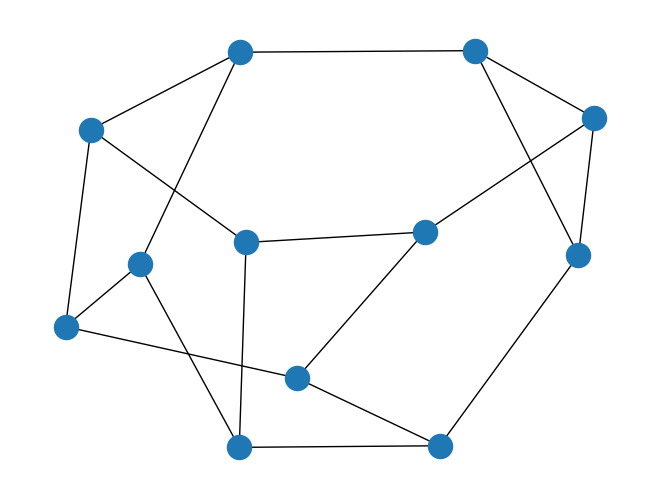

In [7]:
X=nx.random_regular_graph(3,12)
nx.draw(X)

As can be seen, these graphs can be very complicated with many relationshipss:

The graph can be converted to laplacian matrix which described the relationship between all the nodes

In [8]:
A = nx.to_numpy_array(X)
A

array([[0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]])

A 1 is used to indicate the number of relationships between each node. We can then determine the number of relationships between each node and its neighbors.

In [15]:
degree = np.diag(A.sum(axis=1))
print(np.diagonal(degree))

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [16]:
Lapla = degree-A
print(Lapla)

[[ 3. -1.  0.  0.  0.  0. -1.  0.  0. -1.  0.  0.]
 [-1.  3.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  3. -1.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0. -1.  3.  0. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  3. -1.  0.  0.  0. -1.  0. -1.]
 [ 0. -1.  0. -1. -1.  3.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0. -1.  0.  0.  3.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3. -1.  0. -1. -1.]
 [ 0.  0. -1.  0.  0.  0. -1. -1.  3.  0.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.  0.  0.  3.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  3. -1.]
 [ 0.  0.  0.  0. -1.  0.  0. -1.  0.  0. -1.  3.]]


We can calculate the amount of bottlenecking that could occur with this network the the Spectra gap or the Cheeger Constant

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(Lapla)
idx=np.argsort(eigenvalues)
eigenvalues=eigenvalues[idx]
eigenvectors=eigenvectors[:,idx]
print(f"Spectra gap = {eigenvalues[1]}")

Spectra gap = 0.9353480396825766


The second smallest value represents that spasest cut of the graph.

In [19]:
print(f"Sparsest Cut = {eigenvalues[2]}")

Sparsest Cut = 1.3941564139628322


One type of graph that is commonly used is a directed graph. A directed graph has a direction in addition to the relationship between the nodes.

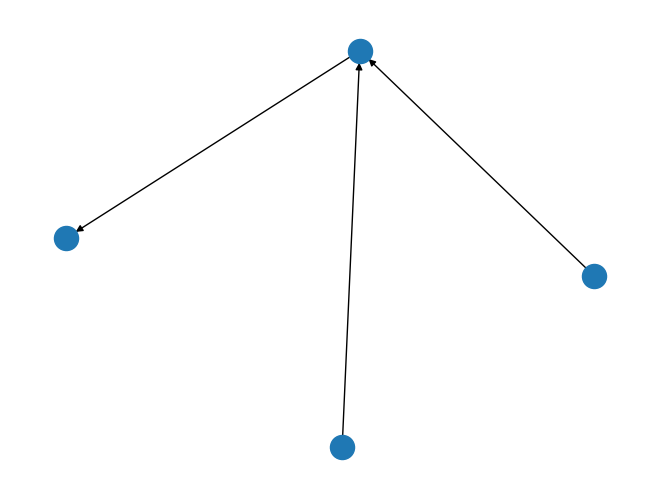

In [5]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (4, 1, 0.75)])
DG.out_degree(1, weight='weight')

DG.degree(1, weight='weight')
nx.draw(DG)